<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Introduction to binary classification using logistic regression
© ExploreAI Academy

In this train, we'll build and refine a logistic regression model to solve a binary classification problem.

## Learning objectives

By the end of this train, you should be able to;
- Understand logistic regression.
- Implement a logistic regression model in sklearn.

## Introduction
The Breast Cancer Wisconsin (Diagnostic) dataset is a classic and very easy binary classification dataset. It contains features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass, where each instance represents information related to a breast cancer cell nucleus. The goal is to classify whether the cell nuclei are **malignant** or **benign** based on these attributes.

The dataset contains **30 numerical features**, such as mean radius, texture, perimeter, area, smoothness, compactness, and several others derived from the cell nuclei images. The target variable is binary: **malignant or benign**.

First, let's load and examine our dataset:

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# list of features
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Exercises

### Exercise 1: Exploratory data analysis (EDA)
Perform an exploratory data analysis on the Breast Cancer dataset. Focus on understanding the distribution of various features and the target variable. Create visualisations to understand the relationships between features and the target variable.

1. To get a general idea of the characteristics of our data, plot the distribution of some of the features. Would we need to do this for all of the features in a real-world situation?
   
   **NOTE**: Use `mean radius` and `mean texture`.
2. Create a correlation heatmap to identify the relationships between features.
3. Analyse the balance between malignant and benign samples in the dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easier manipulation
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])

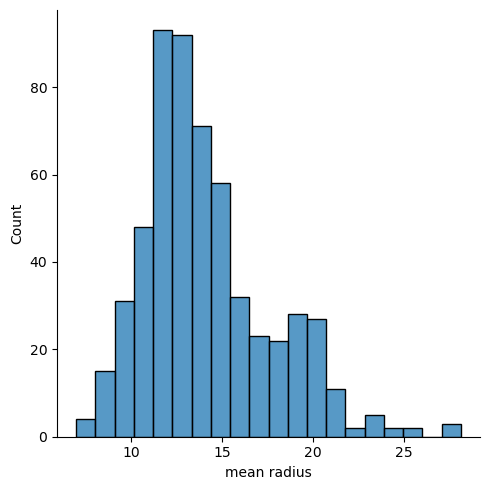

In [9]:
# mean radius distribution plot
sns.displot(df_features['mean radius'], bins=20)
plt.show()


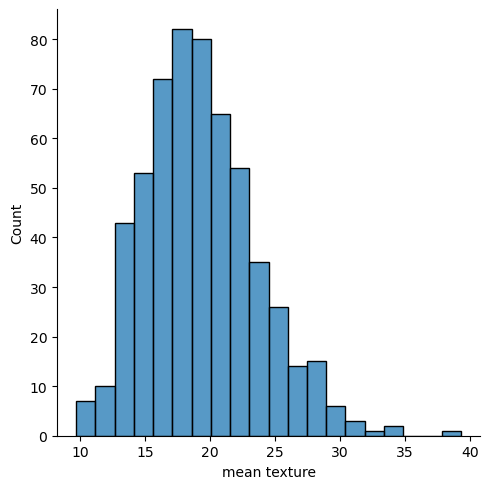

In [10]:
# mean texture distribution plot
sns.displot(df_features['mean texture'], bins=20)
plt.show()

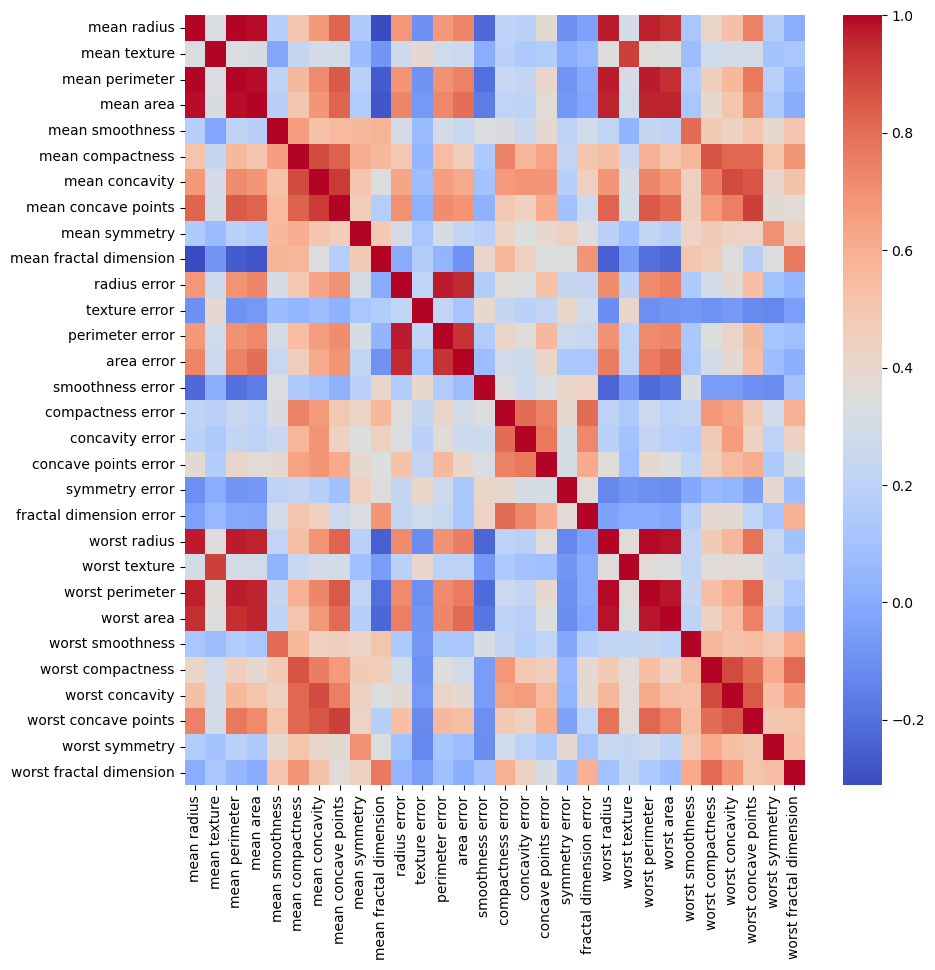

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_features.corr(), annot=False, cmap='coolwarm')
plt.show()

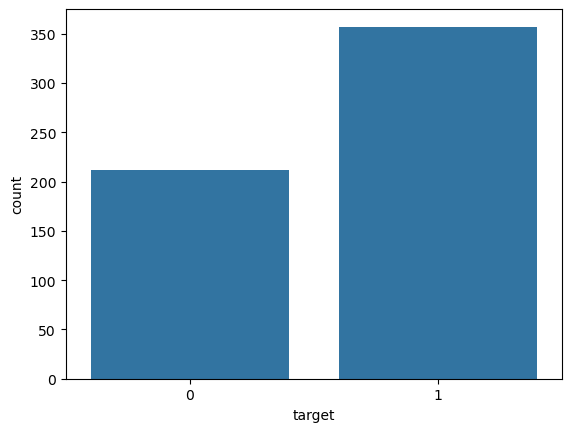

In [12]:
# Balance of target variable
sns.countplot(x='target', data=df_target)
plt.show()

### Exercise 2: Data preparation and model training
Prepare the dataset for logistic regression. 

1. Split the data into training and test sets.
2. Normalise the features using `StandardScaler` from `sklearn.preprocessing`.
3. Train a logistic regression model on the training data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    data.data, 
    data.target, 
    test_size=0.2, 
    random_state=42,
    stratify=data.target  # This ensures training and test sets have similar class proportions
)

# Step 2: Normalise the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Exercise 3: Model evaluation and interpretation
Evaluate the performance of your logistic regression model and interpret the results.

1. Calculate and interpret the model's accuracy on the test set.
2. Use a confusion matrix and classification report to evaluate your model's performance.
3. Interpret the model coefficients: Identify and discuss the top three features that contribute most to predicting malignancy in cell nuclei.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=data.feature_names, columns=['Coefficient'])
top_features = coefficients.abs().sort_values('Coefficient', ascending=False).head(3)
print("Top 3 features contributing to malignancy prediction:")
print(top_features)

Model accuracy: 0.9824561403508771
Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Top 3 features contributing to malignancy prediction:
                      Coefficient
worst texture            1.255088
radius error             1.082965
worst concave points     0.953686


### Challenge exercise: Model improvement
Attempt to improve our model's performance through at least one of the following techniques:
- **Feature selection**: Select a subset of relevant features to train your model.
- **Hyperparameter tuning**: Experiment with different values for the hyperparameters of the logistic regression model (e.g. `C`, the regularisation strength).

In [18]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

Improved Model Accuracy: 0.9736842105263158
Improved Confusion Matrix:
[[40  2]
 [ 1 71]]

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Challenge exercise: Model improvement

It's now time to leverage our findings to improve our logistic regression model. Two potential strategies will be employed: 

1. **Feature selection:** Reflecting on the EDA, we consider the features that showed significant correlations and distinct distributions. We will identify a subset of features that are less correlated with each other but highly correlated with the target. This approach can reduce overfitting and improve model interpretability.

2. **Hyperparameter tuning:** Adjust the hyperparameters of the logistic regression model to optimise performance. The parameter '`C`', which controls the strength of regularisation, can be particularly influential. We'll use cross-validation to find the best value for '`C`' that balances the bias-variance trade-off.

#### Code for model improvement:

By following these steps, you will be able to not only improve your model's performance but also test the effect of each enhancement technique independently. This structured approach provides clarity on the impact of each method on model improvement and yields insights into which adjustments are most effective for this particular dataset and problem.

After model improvement, the accuracy slightly decreased to 97.37%. The new confusion matrix showed an additional false positive compared to the previous model, now making a total of two false positives but maintaining only one false negative. The precision remained high, but there was a slight drop in recall for class '0', resulting in a lower F1 score for that class, which combines precision and recall into a single measure.

This slight decline in accuracy and recall for class '0' after feature selection and hyperparameter tuning suggests that while the model remains very accurate, the reduction of features and adjustment of hyperparameters may have led to it being slightly less sensitive to the minority class (class '0'). Simply put, the original model was already performing at a high level, leaving little room for improvement. However, the model still performs well overall with high precision and F1 scores, which are critical in a clinical setting.

It is also important to note that in different contexts, even a small improvement, or maintaining high performance while reducing the model complexity (fewer features), can be valuable.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>